# Audio Data Collection and Preprocessing


In this section, we collect audio samples and preprocess them for speech recognition tasks. The preprocessing involves recording audio, saving it in a suitable format, and then extracting relevant features that will be used for training a speech recognition model.


## Audio Recording Script 

Below is a Python script for recording audio samples using the *sounddevice* and *wavio* libraries. The script records audio for a predefined list of names, each for a specified duration and sample rate. The audio is then saved as a WAV file.

#### Training/Validation dataset collection and preproccessing 

In [1]:
import sounddevice as sd  
import wavio  
import os  

# Parameters for recording
RATE = 16000  # Sampling rate in Hertz
DURATION = 3  # Duration of the recording in seconds
CHANNELS = 1  # Number of audio channels (1 for mono, 2 for stereo)
NUM_SAMPLES = 20  # Number of samples to record for each name
NAMES = [
    "Alex", "Amy", "David", "Danny", "Emma", "Emily", "John", "Joan", "Michael", "Michelle",
    "Robert", "Rob", "Sarah", "Sandra", "Steven", "Stephanie", "Tom", "Tomas", "Will", "Wilma"
]  # List of names to record

def record_audio(name, sample_num):
    """
    Records a single audio sample for a given name.
    
    Parameters:
    name (str): The name to be recorded.
    sample_num (int): The sample number for the name.
    """
    print(f"Recording sample {sample_num} for {name}...")
    audio_data = sd.rec(int(RATE * DURATION), samplerate=RATE, channels=CHANNELS, dtype='int16')
    sd.wait()  # Wait until the recording is finished
    filename = f"{name}_{sample_num:03}.wav"  # Format the filename with the name and sample number
    wavio.write(filename, audio_data, RATE)  # Save the recorded audio to a WAV file
    print(f"Saved: {filename}")

def main():
    """
    Main function to initiate the recording process for all names.
    """
    os.makedirs("recordings", exist_ok=True)  # Create a directory for recordings if it doesn't exist
    os.chdir("recordings")  # Change the current working directory to 'recordings'
    for name in NAMES:  # Loop over each name
        for sample_num in range(1, NUM_SAMPLES + 1):  # Loop over each sample number
            input(f"Press Enter to record sample {sample_num} for {name}...")  # Prompt to start recording
            record_audio(name, sample_num)  # Record the audio sample

if __name__ == "__main__":
    main()  # Execute the main function if the script is run directly


Recording sample 1 for Alex...
Saved: Alex_001.wav
Recording sample 2 for Alex...
Saved: Alex_002.wav
Recording sample 3 for Alex...
Saved: Alex_003.wav
Recording sample 4 for Alex...
Saved: Alex_004.wav
Recording sample 5 for Alex...
Saved: Alex_005.wav
Recording sample 6 for Alex...
Saved: Alex_006.wav
Recording sample 7 for Alex...
Saved: Alex_007.wav
Recording sample 8 for Alex...
Saved: Alex_008.wav
Recording sample 9 for Alex...
Saved: Alex_009.wav
Recording sample 10 for Alex...
Saved: Alex_010.wav


### Testing data colloection and preproccessing 

In [1]:
import sounddevice as sd  
import wavio  
import os  

# Set the parameters for audio recording
RATE = 16000  # Sample rate (in samples/sec)
DURATION = 3  # Duration of each recording (in seconds)
CHANNELS = 1  # Number of audio channels (1 for mono recording)
NUM_SAMPLES = 10  # Number of samples per name to be recorded
TEST_NAMES = ["Alex", "Amy", "David", "Danny", "Emma", "Emily", "John", "Joan", "Michael", "Michelle", "Robert", "Rob", "Sarah", "Sandra", "Steven", "Stephanie", "Tom", "Tomas", "Will", "Wilma"]  # List of names to be recorded

def record_audio(name, sample_num):
    """
    Function to record audio for a given name and sample number.

    Parameters:
    name (str): The name associated with the audio sample.
    sample_num (int): The sample number for the recording.
    """
    print(f"Recording sample {sample_num} for {name}...")  # Log the recording start
    # Record audio for the given duration and sample rate
    audio_data = sd.rec(int(RATE * DURATION), samplerate=RATE, channels=CHANNELS, dtype='int16')
    sd.wait()  # Wait until the recording is finished
    filename = f"{name}_{sample_num:03}.wav"  # Create a filename for the recording
    wavio.write(filename, audio_data, RATE)  # Save the recording as a WAV file
    print(f"Saved: {filename}")  # Log the saving of the recording

def main():
    # Create a directory for test recordings if it doesn't exist
    os.makedirs("/home/sputniktech/Documents/repos/speach_client/test_recordings", exist_ok=True)
    # Change the working directory to the test recordings directory
    os.chdir("/home/sputniktech/Documents/repos/speach_client/test_recordings")
    # Loop through each name and sample number to record audio
    for name in TEST_NAMES:
        for sample_num in range(1, NUM_SAMPLES + 1):
            input(f"Press Enter to record sample {sample_num} for {name}...")  # Prompt the user to start recording
            record_audio(name, sample_num)  # Call the recording function

if __name__ == "__main__":
    main()  # Execute the main function if the script is run as a standalone module


Recording sample 1 for Alex...
Saved: Alex_001.wav
Recording sample 2 for Alex...
Saved: Alex_002.wav
Recording sample 3 for Alex...
Saved: Alex_003.wav
Recording sample 4 for Alex...
Saved: Alex_004.wav
Recording sample 5 for Alex...
Saved: Alex_005.wav
Recording sample 6 for Alex...
Saved: Alex_006.wav
Recording sample 7 for Alex...
Saved: Alex_007.wav
Recording sample 8 for Alex...
Saved: Alex_008.wav
Recording sample 9 for Alex...
Saved: Alex_009.wav
Recording sample 10 for Alex...
Saved: Alex_010.wav
Recording sample 1 for Amy...
Saved: Amy_001.wav
Recording sample 2 for Amy...
Saved: Amy_002.wav
Recording sample 3 for Amy...
Saved: Amy_003.wav
Recording sample 4 for Amy...
Saved: Amy_004.wav
Recording sample 5 for Amy...
Saved: Amy_005.wav
Recording sample 6 for Amy...
Saved: Amy_006.wav
Recording sample 7 for Amy...
Saved: Amy_007.wav
Recording sample 8 for Amy...
Saved: Amy_008.wav
Recording sample 9 for Amy...
Saved: Amy_009.wav
Recording sample 10 for Amy...
Saved: Amy_010.wa

## Feature extraction

Feature extraction is a crucial step in speech recognition. It involves converting raw audio data into a set of parameters that effectively represent the important characteristics of the voice signal, making it easier for the machine learning model to learn from the data.

For our speech recognition task, we use Mel-frequency cepstral coefficients (MFCCs), root mean square energy (RMSE), and delta coefficients as features. These are commonly used features in speech and audio processing tasks.

We will implement feature extraction using the Tensorflow library, which provides a simple interface for extracting audio features.

### Feature Extraction with Optional White Noise Addition

The script extracts audio features from .wav files while providing an option to add white noise at a specified signal-to-noise ratio (SNR). This is useful for simulating noisy environments and testing the robustness of speech recognition systems under different noise conditions.

#### Methodology
The script uses the librosa library to load audio files and calculate the desired audio features. If an SNR is specified, it adds Gaussian white noise to the signal before feature extraction.

#### Features Extracted
* MFCCs: Represent the short-term power spectrum of sound.
* RMSE: Measures the energy of the audio signal.
* Delta MFCCs: Capture the temporal dynamics of the MFCCs.
#### Usage
To use this script, specify the directory containing .wav files and the desired SNR for adding white noise. Run the script to print out the features for a sample audio file.

In [18]:
import tensorflow as tf
import numpy as np
import os

# Define a function to add white noise to the audio signal
def add_white_noise_tf(signal, snr):
    signal_power = tf.reduce_mean(signal ** 2)
    noise_power = signal_power / (10 ** (snr / 10))
    white_noise = tf.random.normal(tf.shape(signal), stddev=tf.sqrt(noise_power))
    noisy_signal = signal + white_noise
    return noisy_signal

# Define a function to extract MFCC features using TensorFlow
def extract_features_tf(audio_file, snr=None):
    try:
        audio_binary = tf.io.read_file(audio_file)
        waveform, sample_rate = tf.audio.decode_wav(audio_binary, desired_channels=1)
        waveform = tf.squeeze(waveform, axis=-1)
        sample_rate = tf.cast(sample_rate, dtype=tf.float32)

        # If SNR is specified, add white noise to the waveform
        if snr is not None:
            waveform = add_white_noise_tf(waveform, snr)

        # Extract MFCCs using the same parameters as in the Librosa example
        stfts = tf.signal.stft(waveform, frame_length=2048, frame_step=512, fft_length=2048)
        spectrograms = tf.abs(stfts)
        
        num_spectrogram_bins = stfts.shape[-1]
        lower_edge_hertz, upper_edge_hertz, num_mel_bins = 80.0, 7600.0, 80
        linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
            num_mel_bins, num_spectrogram_bins, sample_rate, lower_edge_hertz, upper_edge_hertz)
        mel_spectrograms = tf.tensordot(spectrograms, linear_to_mel_weight_matrix, 1)
        mel_spectrograms.set_shape(spectrograms.shape[:-1].concatenate(linear_to_mel_weight_matrix.shape[-1:]))
        
        log_mel_spectrograms = tf.math.log(mel_spectrograms + 1e-6)

        # Compute MFCCs from log_mel_spectrograms
        mfccs = tf.signal.mfccs_from_log_mel_spectrograms(log_mel_spectrograms)[..., :13]
        
        # Compute delta MFCCs and pad accordingly
        delta_mfccs = tf.experimental.numpy.diff(mfccs, axis=0)
        delta_mfccs_padded = tf.pad(delta_mfccs, [[0, 1], [0, 0]], mode='CONSTANT')

        # Compute root mean square energy for each frame
        frame_length = 2048
        frame_step = 512
        frames = tf.signal.frame(waveform, frame_length, frame_step)
        rms = tf.math.sqrt(tf.reduce_mean(tf.square(frames), axis=1, keepdims=True))
        
        # Ensure that RMS has the same number of frames as MFCCs
        num_frames = tf.shape(mfccs)[0]
        rms = rms[:num_frames, :]
        
        # Combine MFCCs, RMS, and delta MFCCs
        features = tf.concat([mfccs, rms, delta_mfccs_padded], axis=1)

        return features
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None

# List audio files in the directory with a .wav extension
audio_files_dir = "/home/sputniktech/Documents/repos/speach_client/recordings"
audio_files = [os.path.join(audio_files_dir, f) for f in os.listdir(audio_files_dir) if f.endswith('.wav')]

all_features = {}  # Initialize a dictionary to store features for all audio files
desired_SNR = 20  # Desired signal-to-noise ratio for adding white noise

# Loop over each audio file and extract its features
for audio_file in audio_files:
    features = extract_features_tf(audio_file, snr=desired_SNR)
    if features is not None:
        all_features[audio_file] = features.numpy()  # Store the features in the dictionary

# Print features for a single audio file as an example
sample_key = list(all_features.keys())[0]  # Get the first key from the dictionary
print(f"Features for {sample_key}:")
print(all_features[sample_key])  # Print the features for the sample key


Features for /home/sputniktech/Documents/repos/speach_client/recordings/John_016.wav:
[[ 2.3106523  -4.7341256   1.2677518  ... -0.3041763  -0.158059
   0.31887442]
 [ 2.9407742  -4.1575317   1.5589384  ... -0.34707406  0.17917383
   0.20191582]
 [ 2.3258488  -4.3759823   1.9807905  ...  0.09613588  0.03272769
  -0.2819466 ]
 ...
 [ 2.5653505  -4.2799697   1.2357559  ...  0.13935405 -0.22803302
   0.35142982]
 [ 2.6567082  -3.744525    1.6013383  ...  0.18618734 -0.06375409
  -0.21357173]
 [ 2.5861785  -4.291402    1.6161014  ...  0.          0.
   0.        ]]


#### With Data augumenation

In [8]:
import tensorflow as tf
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Configuration settings
config = {
    "frame_length": 2048,
    "frame_step": 512,
    "fft_length": 2048,
    "lower_edge_hertz": 80.0,
    "upper_edge_hertz": 7600.0,
    "num_mel_bins": 80,
    "num_mfcc_coefficients": 13,
    "desired_snr": 20,
    "noise_level": 0.005,
    "audio_files_dir": "/home/sputniktech/Documents/repos/speach_client/recordings",
    "augment_training": True,
}

# Function to add white noise to the audio signal
def add_white_noise_tf(signal, snr):
    signal_power = tf.reduce_mean(signal ** 2)
    noise_power = signal_power / (10 ** (snr / 10))
    white_noise = tf.random.normal(tf.shape(signal), stddev=tf.sqrt(noise_power))
    noisy_signal = signal + white_noise
    return noisy_signal

# Function to inject random noise into the waveform for data augmentation
def noise_injection(waveform, noise_level):
    noise = tf.random.normal(shape=tf.shape(waveform), mean=0.0, stddev=noise_level)
    return waveform + noise

# Function to extract MFCC features using TensorFlow
def extract_features_tf(audio_file, snr=None, augment=False):
    try:
        audio_binary = tf.io.read_file(audio_file)
        waveform, sample_rate = tf.audio.decode_wav(audio_binary, desired_channels=1)
        waveform = tf.squeeze(waveform, axis=-1)
        sample_rate = tf.cast(sample_rate, dtype=tf.float32)

        # Add white noise if SNR is specified
        if snr is not None:
            waveform = add_white_noise_tf(waveform, snr)

        # Inject noise if augmentation is True
        if augment:
            waveform = noise_injection(waveform, config['noise_level'])

        # Extract MFCCs and other features
        stfts = tf.signal.stft(waveform, frame_length=config['frame_length'], frame_step=config['frame_step'], fft_length=config['fft_length'])
        spectrograms = tf.abs(stfts)
        
        num_spectrogram_bins = stfts.shape[-1]
        linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
            config['num_mel_bins'], num_spectrogram_bins, sample_rate, config['lower_edge_hertz'], config['upper_edge_hertz'])
        mel_spectrograms = tf.tensordot(spectrograms, linear_to_mel_weight_matrix, 1)
        mel_spectrograms.set_shape(spectrograms.shape[:-1].concatenate(linear_to_mel_weight_matrix.shape[-1:]))
        
        log_mel_spectrograms = tf.math.log(mel_spectrograms + 1e-6)
        mfccs = tf.signal.mfccs_from_log_mel_spectrograms(log_mel_spectrograms)[..., :config['num_mfcc_coefficients']]
        
        delta_mfccs = tf.experimental.numpy.diff(mfccs, axis=0)
        delta_mfccs_padded = tf.pad(delta_mfccs, [[0, tf.maximum(0, tf.shape(mfccs)[0] - tf.shape(delta_mfccs)[0])], [0, 0]], mode='CONSTANT')

        frames = tf.signal.frame(waveform, config['frame_length'], config['frame_step'])
        rms = tf.math.sqrt(tf.reduce_mean(tf.square(frames), axis=1, keepdims=True))
        num_frames = tf.shape(mfccs)[0]
        rms = rms[:num_frames, :]
        
        features = tf.concat([mfccs, rms, delta_mfccs_padded], axis=1)

        return features
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None

# Split the dataset into training and validation sets
audio_files = [os.path.join(config['audio_files_dir'], f) for f in os.listdir(config['audio_files_dir']) if f.endswith('.wav')]
train_files, val_files = train_test_split(audio_files, test_size=0.2, random_state=42)

# Function to process files and extract features
def process_files(files, augment):
    features_dict = {}
    for file in files:
        features = extract_features_tf(file, snr=config['desired_snr'], augment=augment)
        if features is not None:
            features_dict[file] = features.numpy()
    return features_dict

# Extract features for both training and validation sets
train_features = process_files(train_files, augment=config['augment_training'])
val_features = process_files(val_files, augment=False)

# Now, `train_features` contains augmented features for training and `val_features` contains unaugmented features for validation.


## Acoustic Modeling 

### Overview

This document provides details on the acoustic model training process for a speech recognition system. The model is a Convolutional Recurrent Neural Network (CRNN) designed to recognize spoken names from audio signals. It is trained using a dataset of MFCC features extracted from `.wav` files.

### Model Architecture

The CRNN architecture combines convolutional neural network (CNN) layers for feature extraction from audio spectrograms with recurrent neural network (RNN) layers to capture the temporal dependencies in the audio sequence.

#### Convolutional Layers

- **32, 64, 128 filters**: These filters extract various features from the input spectrogram.
- **Batch Normalization**: Normalizes the activations of the previous layer, which speeds up training and reduces the sensitivity to network initialization.
- **MaxPooling**: Reduces the dimensionality of each feature map but retains the most important information.
- **Dropout**: Regularization technique to prevent overfitting by dropping out units in the network.

#### Recurrent Layers

- **256 LSTM units**: These layers process the sequence data, allowing the network to learn from the temporal sequence in the audio.
- **Dropout and Recurrent Dropout**: Further regularization to prevent overfitting in the LSTM layers.

#### Dense Layers

- **512 units**: Fully connected layer to learn non-linear combinations of the high-level features extracted by the CNN and LSTM layers.
- **Softmax output**: Outputs a probability distribution over the target classes (the names).

### Training

The model is trained using a cross-entropy loss function, suitable for multi-class classification problems. An Adam optimizer is used for adaptive learning rate optimization. Training is monitored using a validation set, and the learning rate is reduced if the validation loss plateaus.

### Usage

Run the script to train the model. Adjust the `epochs` and `batch_size` as necessary to fit the computational resources available. After training, the model will be saved to the specified path and can be loaded for speech recognition tasks.



#### Without Data augumenation

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# Preparing the data for the model
X = []  # Feature list
y = []  # Label list

# Loop through each file and extract features and labels
for file, features in all_features.items():
    X.append(features)
    # Extract the label (name) from the filename
    y.append(file.split('/')[-1].split('_')[0])

# Convert labels (names) to integer encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_int)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
# Reshape the data to fit the model input
X_train = np.array(X_train).reshape(-1, X_train[0].shape[0], X_train[0].shape[1], 1)
X_val = np.array(X_val).reshape(-1, X_val[0].shape[0], X_val[0].shape[1], 1)

# Building an enhanced Convolutional Recurrent Neural Network (CRNN) model
model = Sequential()

# Convolutional layers with Batch Normalization
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train[0].shape[0], X_train[0].shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output of the conv layers to feed into the RNN
model.add(TimeDistributed(Flatten()))

# Recurrent layers with LSTM units
model.add(LSTM(256, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))
model.add(LSTM(256, dropout=0.25, recurrent_dropout=0.1))

# Dense (fully connected) layers for classification
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compiling the model with Adam optimizer and learning rate scheduler
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model with the training data and validating using the validation set
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[lr_scheduler])

# Saving the trained model to disk
model_path = "/home/sputniktech/Documents/repos/speach_client/acoustic_model_enhanced.keras" 
model.save(model_path)


Epoch 1/50
10/10 [==============================] - 8s 244ms/step - loss: 2.9965 - accuracy: 0.0531 - val_loss: 2.9836 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 2/50
10/10 [==============================] - 2s 176ms/step - loss: 2.9020 - accuracy: 0.1406 - val_loss: 2.9420 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 3/50
10/10 [==============================] - 2s 162ms/step - loss: 2.5341 - accuracy: 0.2375 - val_loss: 2.8875 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 4/50
10/10 [==============================] - 2s 172ms/step - loss: 2.0092 - accuracy: 0.3500 - val_loss: 2.5065 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 5/50
10/10 [==============================] - 2s 186ms/step - loss: 1.4538 - accuracy: 0.4969 - val_loss: 3.2343 - val_accuracy: 0.0750 - lr: 0.0010
Epoch 6/50
10/10 [==============================] - 2s 158ms/step - loss: 1.1298 - accuracy: 0.5875 - val_loss: 2.1555 - val_accuracy: 0.2250 - lr: 0.0010
Epoch 7/50
10/10 [==============================] - 2s 158ms/step - lo

#### Model Training with Data augumentation

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming `train_features` and `val_features` are already loaded from the feature extraction script

# Define the extract_label function here
def extract_label(file_path):
    # Your logic to extract the label from the filename
    # For example, if your file is "cat_01.wav" and "cat" is the label:
    return file_path.split('/')[-1].split('_')[0]

# Prepare the data for the model
X_train = np.array([features for features in train_features.values()])
y_train = np.array([extract_label(file) for file in train_features.keys()])

X_val = np.array([features for features in val_features.values()])
y_val = np.array([extract_label(file) for file in val_features.keys()])

# Convert labels to categorical (one-hot encoding)
label_encoder = LabelEncoder()
y_train_int = label_encoder.fit_transform(y_train)
y_train_categorical = to_categorical(y_train_int)

y_val_int = label_encoder.transform(y_val)
y_val_categorical = to_categorical(y_val_int)

# Reshape the data to fit the model input if necessary
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(-1, X_val.shape[1], X_val.shape[2], 1)


# Building an enhanced Convolutional Recurrent Neural Network (CRNN) model
model = Sequential()

# Convolutional layers with Batch Normalization
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# TimeDistributed layer to reshape the output for LSTM layers
model.add(TimeDistributed(Flatten()))

# Recurrent layers with LSTM units
model.add(LSTM(256, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))
model.add(LSTM(256, dropout=0.25, recurrent_dropout=0.1))

# Dense (fully connected) layers for classification
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compiling the model with Adam optimizer and learning rate scheduler
optimizer = Adam(learning_rate=0.001)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model with the training data and validating using the validation set
history = model.fit(X_train, y_train_categorical, validation_data=(X_val, y_val_categorical), epochs=50, batch_size=32, callbacks=[lr_scheduler])

# Saving the trained model to disk
model_path = "/home/sputniktech/Documents/repos/speach_client/acoustic_model_enhanced_tensor.keras" 
model.save(model_path)


Epoch 1/50
10/10 [==============================] - 8s 242ms/step - loss: 3.0107 - accuracy: 0.0500 - val_loss: 2.9912 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 2/50
10/10 [==============================] - 2s 157ms/step - loss: 2.9145 - accuracy: 0.1156 - val_loss: 2.9480 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 3/50
10/10 [==============================] - 2s 158ms/step - loss: 2.7195 - accuracy: 0.1750 - val_loss: 2.8661 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 4/50
10/10 [==============================] - 2s 156ms/step - loss: 2.2561 - accuracy: 0.2937 - val_loss: 2.7302 - val_accuracy: 0.1125 - lr: 0.0010
Epoch 5/50
10/10 [==============================] - 2s 154ms/step - loss: 1.5765 - accuracy: 0.4531 - val_loss: 2.6801 - val_accuracy: 0.1500 - lr: 0.0010
Epoch 6/50
10/10 [==============================] - 2s 161ms/step - loss: 1.1979 - accuracy: 0.5500 - val_loss: 2.3785 - val_accuracy: 0.2750 - lr: 0.0010
Epoch 7/50
10/10 [==============================] - 2s 154ms/step - lo

## Testing and Evaluation - Feature Extraction for Test Data

To ensure the robustness of our speech recognition system, we need to evaluate the model on a separate test dataset. This test dataset should ideally reflect the conditions under which the system will be used, including various levels of background noise. The feature extraction process for test data involves the following steps:

### White Noise Addition
To simulate a noisy environment, we can add white noise to our test audio files. This is done by defining a desired signal-to-noise ratio (SNR) and then adding corresponding white noise to the signal.

### Environmental Noise Mixing
We also evaluate the system in the presence of real-world environmental noises. This involves mixing the test audio signals with pre-segmented chunks of environmental noise, such as street sounds or cafe ambiance.

### Feature Extraction
For both the above noise conditions, we extract Mel-frequency cepstral coefficients (MFCCs), root mean square (RMS) energy, and their deltas. These features are widely used in speech processing and provide a compact representation of the audio signal.

### Test Data Preparation
We compile a dictionary of features for each test audio file, which can then be fed into the trained model to predict the spoken name.

This procedure allows us to validate the model's performance and make any necessary adjustments before deployment.


### Feature Extraction for Test Data for the Non Data augmenation model

#### Feature Extraction for Test Data with White Noise

In [20]:
import tensorflow as tf
import numpy as np
import os

# Define a function to add white noise to the audio signal
def add_white_noise_tf(signal, snr):
    signal_power = tf.reduce_mean(signal ** 2)
    noise_power = signal_power / (10 ** (snr / 10))
    white_noise = tf.random.normal(tf.shape(signal), stddev=tf.sqrt(noise_power))
    noisy_signal = signal + white_noise
    return noisy_signal

# Define a function to extract MFCC features using TensorFlow
def extract_features_tf(audio_file, snr=None):
    try:
        audio_binary = tf.io.read_file(audio_file)
        waveform, sample_rate = tf.audio.decode_wav(audio_binary, desired_channels=1)
        waveform = tf.squeeze(waveform, axis=-1)
        sample_rate = tf.cast(sample_rate, dtype=tf.float32)

        # If SNR is specified, add white noise to the waveform
        if snr is not None:
            waveform = add_white_noise_tf(waveform, snr)

        # Extract MFCCs using the same parameters as in the Librosa example
        stfts = tf.signal.stft(waveform, frame_length=2048, frame_step=512, fft_length=2048)
        spectrograms = tf.abs(stfts)
        
        num_spectrogram_bins = stfts.shape[-1]
        lower_edge_hertz, upper_edge_hertz, num_mel_bins = 80.0, 7600.0, 80
        linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
            num_mel_bins, num_spectrogram_bins, sample_rate, lower_edge_hertz, upper_edge_hertz)
        mel_spectrograms = tf.tensordot(spectrograms, linear_to_mel_weight_matrix, 1)
        mel_spectrograms.set_shape(spectrograms.shape[:-1].concatenate(linear_to_mel_weight_matrix.shape[-1:]))
        
        log_mel_spectrograms = tf.math.log(mel_spectrograms + 1e-6)

        # Compute MFCCs from log_mel_spectrograms
        mfccs = tf.signal.mfccs_from_log_mel_spectrograms(log_mel_spectrograms)[..., :13]
        
        # Compute delta MFCCs and pad accordingly
        delta_mfccs = tf.experimental.numpy.diff(mfccs, axis=0)
        delta_mfccs_padded = tf.pad(delta_mfccs, [[0, 1], [0, 0]], mode='CONSTANT')

        # Compute root mean square energy for each frame
        frame_length = 2048
        frame_step = 512
        frames = tf.signal.frame(waveform, frame_length, frame_step)
        rms = tf.math.sqrt(tf.reduce_mean(tf.square(frames), axis=1, keepdims=True))
        
        # Ensure that RMS has the same number of frames as MFCCs
        num_frames = tf.shape(mfccs)[0]
        rms = rms[:num_frames, :]
        
        # Combine MFCCs, RMS, and delta MFCCs
        features = tf.concat([mfccs, rms, delta_mfccs_padded], axis=1)

        return features
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None

# List audio files in the directory with a .wav extension
audio_files_dir = "/home/sputniktech/Documents/repos/speach_client/test_recordings"
audio_files = [os.path.join(audio_files_dir, f) for f in os.listdir(audio_files_dir) if f.endswith('.wav')]

test_features = {}  # Initialize a dictionary to store features for all audio files
desired_SNR = 20  # Desired signal-to-noise ratio for adding white noise

# Loop over each audio file and extract its features
for audio_file in audio_files:
    features = extract_features_tf(audio_file, snr=desired_SNR)
    if features is not None:
        test_features[audio_file] = features.numpy()  # Store the features in the dictionary

# Print features for a single audio file as an example
sample_key = list(test_features.keys())[0]  # Get the first key from the dictionary
print(f"Features for {sample_key}:")
print(test_features[sample_key])  # Print the features for the sample key


Features for /home/sputniktech/Documents/repos/speach_client/test_recordings/Joan_007.wav:
[[ 2.0232759e+01 -4.7583866e+00  1.3994212e+00 ... -8.4991641e-03
  -9.8707318e-02 -7.6562420e-02]
 [ 1.9972759e+01 -4.9480224e+00  6.2160176e-01 ... -3.0142280e-01
  -5.9280020e-01 -4.1964957e-01]
 [ 2.1154633e+01 -4.4414330e+00  1.0087856e+00 ...  1.8298179e-01
   3.4820423e-02  6.9154158e-02]
 ...
 [ 2.1361929e+01 -4.2883930e+00  8.8579643e-01 ...  3.0270463e-01
   2.4175122e-02  4.4808513e-01]
 [ 2.1182413e+01 -4.2162094e+00  1.0885798e+00 ... -1.5835080e-01
  -1.3898888e-01  3.3114427e-01]
 [ 2.0717314e+01 -4.0697322e+00  1.4034400e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]


### Feature Extraction for Test Data for the Data augmenation model


In [15]:
import tensorflow as tf
import numpy as np
import os

# Configuration settings used during training
config = {
    "frame_length": 2048,
    "frame_step": 512,
    "fft_length": 2048,
    "lower_edge_hertz": 80.0,
    "upper_edge_hertz": 7600.0,
    "num_mel_bins": 80,
    "num_mfcc_coefficients": 13,
    "desired_snr": 20,  # Same SNR as used during training for consistency
}

# Function to add white noise to the audio signal
def add_white_noise_tf(signal, snr):
    signal_power = tf.reduce_mean(signal ** 2)
    noise_power = signal_power / (10 ** (snr / 10))
    white_noise = tf.random.normal(tf.shape(signal), stddev=tf.sqrt(noise_power))
    noisy_signal = signal + white_noise
    return noisy_signal

# Function to extract MFCC features using TensorFlow
def extract_features_tf(audio_file, snr=None):
    try:
        audio_binary = tf.io.read_file(audio_file)
        waveform, sample_rate = tf.audio.decode_wav(audio_binary, desired_channels=1)
        waveform = tf.squeeze(waveform, axis=-1)
        sample_rate = tf.cast(sample_rate, dtype=tf.float32)

        # Add white noise if SNR is specified
        if snr is not None:
            waveform = add_white_noise_tf(waveform, snr)

        # Feature extraction process similar to training
        stfts = tf.signal.stft(waveform, frame_length=config['frame_length'], frame_step=config['frame_step'], fft_length=config['fft_length'])
        spectrograms = tf.abs(stfts)

        num_spectrogram_bins = stfts.shape[-1]
        linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
            config['num_mel_bins'], num_spectrogram_bins, sample_rate, config['lower_edge_hertz'], config['upper_edge_hertz'])
        mel_spectrograms = tf.tensordot(spectrograms, linear_to_mel_weight_matrix, 1)
        mel_spectrograms.set_shape(spectrograms.shape[:-1].concatenate(linear_to_mel_weight_matrix.shape[-1:]))

        log_mel_spectrograms = tf.math.log(mel_spectrograms + 1e-6)
        mfccs = tf.signal.mfccs_from_log_mel_spectrograms(log_mel_spectrograms)[..., :config['num_mfcc_coefficients']]

        delta_mfccs = tf.experimental.numpy.diff(mfccs, axis=0)
        delta_mfccs_padded = tf.pad(delta_mfccs, [[0, tf.maximum(0, tf.shape(mfccs)[0] - tf.shape(delta_mfccs)[0])], [0, 0]], mode='CONSTANT')

        frames = tf.signal.frame(waveform, config['frame_length'], config['frame_step'])
        rms = tf.math.sqrt(tf.reduce_mean(tf.square(frames), axis=1, keepdims=True))
        num_frames = tf.shape(mfccs)[0]
        rms = rms[:num_frames, :]

        features = tf.concat([mfccs, rms, delta_mfccs_padded], axis=1)

        return features
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None

# Path to the directory containing test audio files
audio_files_dir = "/home/sputniktech/Documents/repos/speach_client/test_recordings"
audio_files = [os.path.join(audio_files_dir, f) for f in os.listdir(audio_files_dir) if f.endswith('.wav')]

test_features = {}  # Initialize a dictionary to store features for all audio files

# Loop over each audio file and extract its features without augmentation
for audio_file in audio_files:
    features = extract_features_tf(audio_file, snr=config['desired_snr'])
    if features is not None:
        test_features[audio_file] = features.numpy()  # Store the features in the dictionary

# Example of printing features for a single audio file
sample_key = list(test_features.keys())[0]  # Get the first key from the dictionary
print(f"Features for {sample_key}:")
print(test_features[sample_key])  # Print the features for the sample key


Features for /home/sputniktech/Documents/repos/speach_client/test_recordings/Joan_007.wav:
[[ 2.1184267e+01 -4.7029300e+00  8.6373472e-01 ...  3.1475046e-01
   2.8452873e-03  1.7303619e-01]
 [ 2.0435732e+01 -4.5302157e+00  7.0234215e-01 ... -3.3881766e-01
  -1.3185623e-01 -2.2200918e-01]
 [ 2.1214182e+01 -4.4688935e+00  8.9599854e-01 ...  5.5244155e-02
  -1.7256367e-01  2.8085405e-01]
 ...
 [ 2.0881336e+01 -4.3417530e+00  1.4682750e+00 ...  9.2923619e-02
  -4.7031015e-02 -2.1886748e-01]
 [ 2.0753542e+01 -4.2954350e+00  1.1826620e+00 ...  3.7216145e-01
   1.4765587e-01  2.2927749e-01]
 [ 2.0711107e+01 -4.2433543e+00  1.0423839e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]


### Predict Using the Trained Model

After training our Convolutional Recurrent Neural Network (CRNN) model, we now use it to predict the names spoken in our test dataset. The steps are as follows:

1. **Model Loading:** We load the trained model from its saved location.
2. **Label Encoding:** We use a `LabelEncoder` to encode the possible output labels (the names) which the model was trained on. This allows us to interpret the model's predictions.
3. **Prediction:** We feed the extracted features of the test dataset into the model to obtain the predicted labels.
4. **Decoding Predictions:** The predicted labels, which are in the encoded form, are then inverted back to the corresponding names using the `LabelEncoder`.

This process will give us the names that the model predicts for each audio file in the test dataset.

#### Use ether the Non Data augmented model or the data augmented model, choose whats best for you 


make sure to change the tained model to use for testing either `/home/sputniktech/Documents/repos/speach_client/acoustic_model_enhanced_tensor.keras` or `/home/sputniktech/Documents/repos/speach_client/acoustic_model_enhanced.keras`

In [21]:
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Define the list of names that the model was trained on
NAMES = [
    "Alex", "Amy", "David", "Danny", "Emma", "Emily", "John", "Joan", "Michael",
    "Michelle", "Robert", "Rob", "Sarah", "Sandra", "Steven", "Stephanie", 
    "Tom", "Tomas", "Will", "Wilma"
]

# Load the trained model from the specified path
model = load_model('/home/sputniktech/Documents/repos/speach_client/acoustic_model_enhanced.keras')

# Create and fit the label encoder with the names
# This will be used to encode and decode the labels (names)
name_encoding = LabelEncoder()
name_encoding.fit(NAMES)

# Prepare the test data for prediction by converting the dictionary of features to an array
test_data = np.array(list(test_features.values()))

# Predict the indices of the names, which are the positions of the labels in NAMES list
predicted_indices = np.argmax(model.predict(test_data), axis=1)

# Use the fitted label encoder to transform the indices back to actual names
predicted_names = name_encoding.inverse_transform(predicted_indices)


7/7 [==============================] - 1s 35ms/step


### Evaluate the Model

Evaluating the model involves comparing the predicted names against the true names from the test dataset. The following steps are included in the evaluation:

1. **Accuracy Calculation:** We calculate the accuracy percentage, which reflects the overall performance of the model.
2. **Confusion Matrix:** A confusion matrix is generated to show the detailed prediction results, including which names are being confused with others.
3. **Visualization:** We use a heatmap to visualize the confusion matrix, providing an intuitive way to assess where the model is performing well and where it is making mistakes.

By examining the confusion matrix, we can identify if the model is consistently misclassifying certain names, which could indicate areas for further improvement.


Accuracy: 44.50%
Unique true names: {'Sandra', 'Robert', 'Sarah', 'Steven', 'Alex', 'Tom', 'Rob', 'Emma', 'Danny', 'Wilma', 'Amy', 'David', 'Joan', 'John', 'Michelle', 'Emily', 'Tomas', 'Michael', 'Will', 'Stephanie'}
Unique predicted names: {'Wilma', 'Danny', 'Alex', 'John', 'Michelle', 'Amy', 'Sarah', 'David', 'Tomas', 'Will', 'Rob', 'Robert', 'Stephanie', 'Emma', 'Steven'}
Training names: {'Sandra', 'Sarah', 'Robert', 'Steven', 'Alex', 'Tom', 'Rob', 'Emma', 'Danny', 'Wilma', 'Amy', 'David', 'Joan', 'John', 'Michelle', 'Emily', 'Tomas', 'Michael', 'Will', 'Stephanie'}


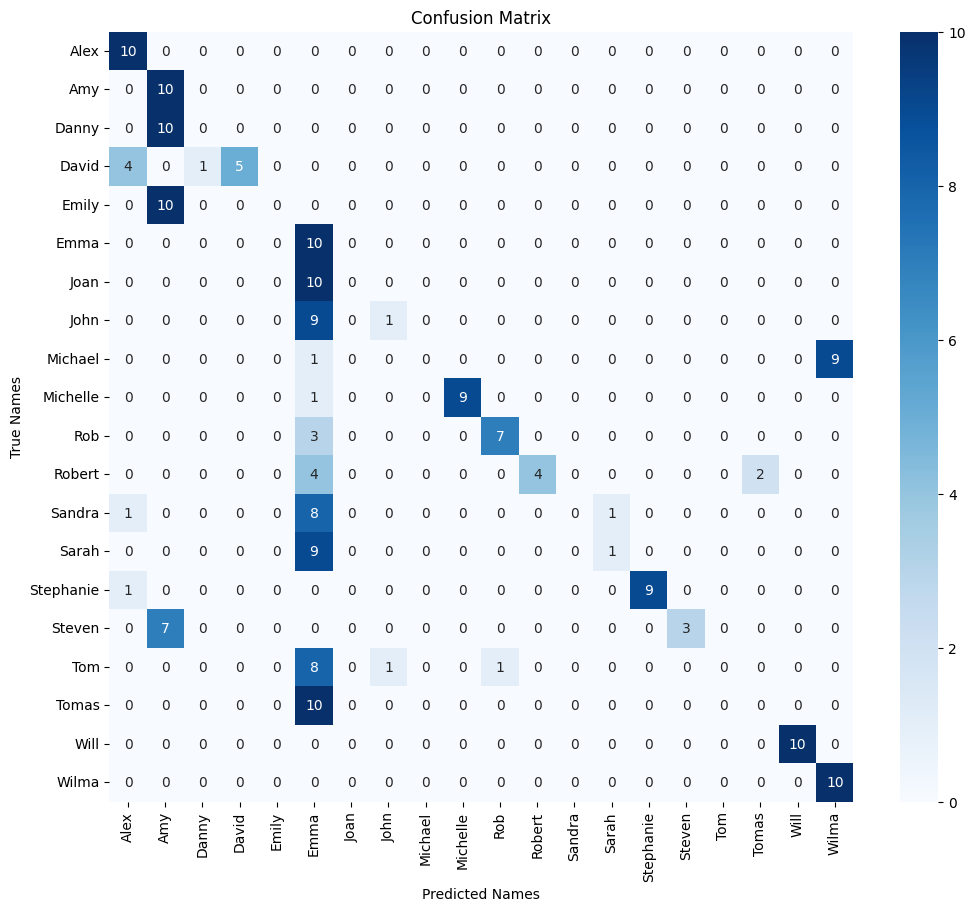

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Extract true labels/names from the filenames of the test dataset
true_names = [os.path.basename(f).split('_')[0] for f in test_features.keys()]

# Calculate the accuracy of the predictions
accuracy = accuracy_score(true_names, predicted_names)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print out the unique names to check if there are any mismatches
print("Unique true names:", set(true_names))
print("Unique predicted names:", set(predicted_names))
print("Training names:", set(name_encoding.classes_))

# Generate the confusion matrix using the true and predicted labels
cm = confusion_matrix(true_names, predicted_names, labels=list(name_encoding.classes_))

# Plot the confusion matrix in a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=name_encoding.classes_, yticklabels=name_encoding.classes_)
plt.xlabel('Predicted Names')
plt.ylabel('True Names')
plt.title('Confusion Matrix')
plt.show()
